In [405]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma

In [406]:
df = pd.read_csv("wine_data.csv",index_col=[0]).dropna(subset=['price'])
# df.head(100)

In [407]:
Q99 = int(df["price"].quantile(0.99))
# print(Q99)
Q10 = int(df["price"].quantile(0.10))

In [408]:
df.drop(df[ (df['price'] > Q99)].index , inplace=True)
# df.head(100)

Create a new column with price intervals
Count the points in each interval for each point value
Rename the columns to match your desired format
Normalize each column to add up to 100
Fill NaN values with 0

In [409]:
df['price_interval'] = pd.cut(df['price'], bins=np.arange(0, Q99+5, 5), right=False)

temp = pd.crosstab(index=df['points'], columns=df['price_interval'])
temp.columns = ["under"+str(int(b)) for b in range(5,Q99+5,5)]

df = temp.apply(lambda x: (x / x.sum()) * 100, axis=0)
df = df.fillna(0).astype(int)

print(df)

        under5  under10  under15  under20  under25  under30  under35  under40  \
points                                                                          
80           0        2        1        0        0        0        0        0   
81           0        4        2        1        1        0        0        0   
82           0        8        5        3        2        2        2        1   
83          11       14        9        5        3        2        2        2   
84          50       21       14        8        7        5        4        3   
85           5       18       16       11        8        7        5        5   
86          33       14       17       14       11       10        8        7   
87           0        9       16       20       17       14       13       12   
88           0        4        9       14       16       15       13       11   
89           0        1        4        7       10       11       11       10   
90           0        0     

In [410]:
df_weight = df.multiply((df.index - 80), axis=0)
# print(df_weight)

In [411]:
mean = df_weight.sum()/100
# mean

In [412]:
variance = df.var()
# variance

In [413]:
alpha_mom = (mean**2)/variance
beta_mom = variance/mean
# alpha_mom, beta_mom

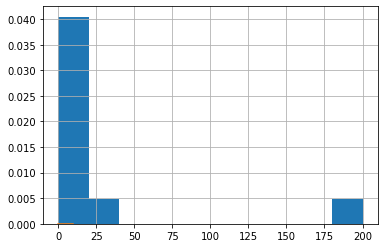

In [414]:
df_result.under5.hist(density=True, bins=10)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

In [415]:
setsize="""
axs[0, 0].set_xlim(0, 20)
axs[0, 0].set_ylim(0, 0.5)
"""

List of values for "underX"
underX_values = [i for i in range(5,Q99+5,5)]  # Fill in the desired values
print(underX_values)
Create a figure with subplots
fig, axs = plt.subplots(6, 5, figsize=(10, 10), sharex=True, sharey=True)

Create a histogram for the current "underX"
    axs[row_idx, col_idx].hist(result[f'under{underX}'], density=True, bins=7)
    # Fit and plot the gamma distribution for the current "underX"
    axs[row_idx, col_idx].plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[i], beta_mom[i]))
    if row_idx==0 and col_idx==0: exec(setsize)

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[i], beta_mom[i])
    axs[row_idx, col_idx].annotate(label, xy=(8, 0.3))

Set titles for the subplots (underX values)
for i, underX in enumerate(underX_values):
    axs[row_idx, col_idx].set_title(f'under{underX}')

plt.tight_layout()
plt.show()


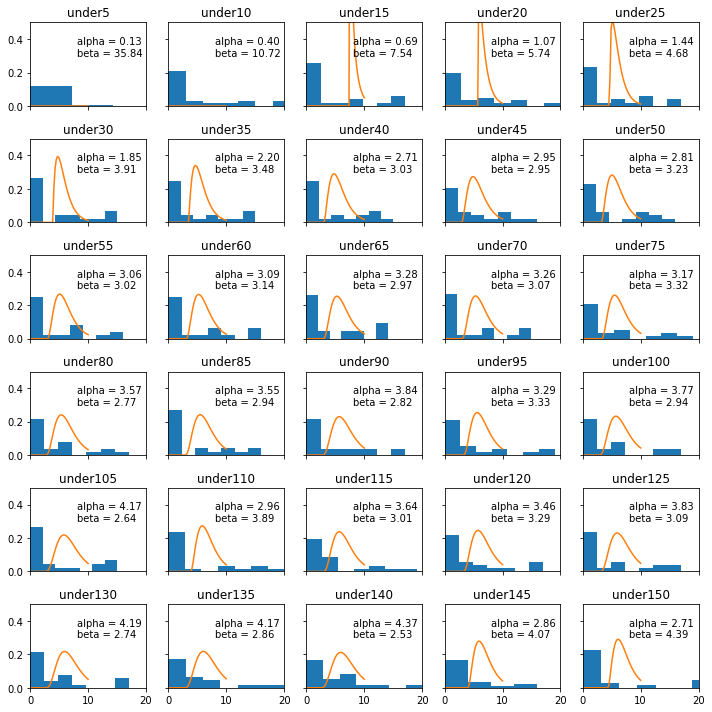

In [420]:
underX_values = [i for i in range(5,Q99+5,5)] 
fig, axs = plt.subplots(6, 5, figsize=(10, 10), sharex=True, sharey=True)


for i, underX in enumerate(underX_values):
    
    row_idx = i // 5
    col_idx = i % 5

    axs[row_idx, col_idx].hist(result[f'under{underX}'], density=True, bins=7)
    axs[row_idx, col_idx].plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[i], beta_mom[i]))
    if row_idx==0 and col_idx==0: exec(setsize)

    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[i], beta_mom[i])
    axs[row_idx, col_idx].annotate(label, xy=(8, 0.3))
    axs[row_idx, col_idx].set_title(f'under{underX}')

plt.tight_layout()
plt.show()